In [10]:
import tensorflow as tf
import numpy as np
from keras.callbacks import History
from keras.callbacks import ModelCheckpoint
import pandas as pd
import matplotlib.pyplot as plt


In [18]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [25]:
y_val=pd.DataFrame(y_train)
y_val=y_val.value_counts()

<BarContainer object of 10 artists>

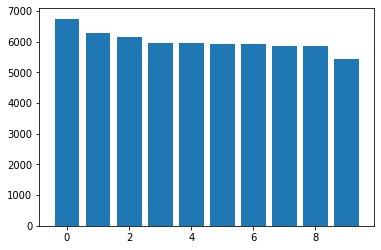

In [26]:
indexes=[i for i  in range(0,10)]
plt.bar(indexes,y_val)

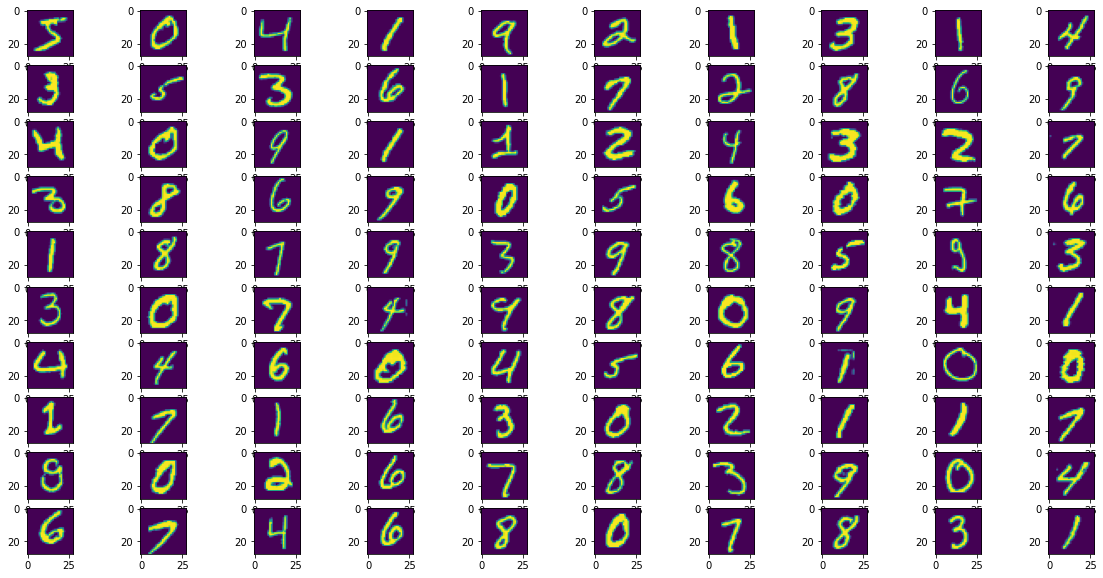

In [57]:
fig, axs = plt.subplots(10,10,figsize=(20,10))
count=0
for i in range(0,10):
  for j in range(0,10):
    axs[i][j].imshow(x_train[count])
    count+=1

In [27]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10))

In [28]:
predictions=model(x_train[:1]).numpy()

In [29]:
predictions

array([[ -31.285088, -116.527016,   98.16015 ,   11.512329, -144.29565 ,
         -77.87518 , -146.87193 ,  -14.283829,   72.01012 ,   86.54132 ]],
      dtype=float32)

In [30]:
tf.nn.softmax(predictions)

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[0.0000000e+00, 0.0000000e+00, 9.9999106e-01, 2.3405947e-38,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        4.3972534e-12, 8.9950445e-06]], dtype=float32)>

In [31]:
checkpoint_filepath = '/content/checkpoints'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='accuracy',
    mode='max',
    save_best_only=True)

In [32]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [33]:
val=model.fit(x_train,y_train,epochs=20,callbacks=[model_checkpoint_callback])

Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.8143 - accuracy: 0.8348
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3248 - accuracy: 0.9123
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2525 - accuracy: 0.9301
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2286 - accuracy: 0.9374
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2053 - accuracy: 0.9447
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1860 - accuracy: 0.9504
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1688 - accuracy: 0.9547
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1547 - accuracy: 0.9592
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1482 - accuracy: 0.9616
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.151

In [34]:
val.history['loss']

[1.8143376111984253,
 0.32476097345352173,
 0.25246569514274597,
 0.22861377894878387,
 0.20531852543354034,
 0.18603862822055817,
 0.16875258088111877,
 0.15470203757286072,
 0.14816918969154358,
 0.15164099633693695,
 0.13701197504997253,
 0.13133198022842407,
 0.12932603061199188,
 0.13012446463108063,
 0.12473690509796143,
 0.12268633395433426,
 0.11822905391454697,
 0.12366309762001038,
 0.12151334434747696,
 0.12088707089424133]

In [35]:
import matplotlib.pyplot as plt


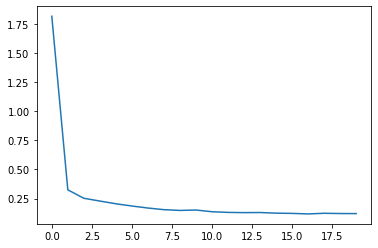

In [36]:
plt.plot(val.history['loss'])

In [37]:
model.load_weights(checkpoint_filepath)

In [40]:
model.evaluate(x_test,y_test,verbose=2)

313/313 - 0s - loss: 0.1935 - accuracy: 0.9692


[0.1934690773487091, 0.9692000150680542]

In [42]:
pred=model(x_test)

In [43]:
tf.nn.softmax(pred)

<tf.Tensor: shape=(10000, 10), dtype=float32, numpy=
array([[0.0000000e+00, 0.0000000e+00, 9.3228454e-37, ..., 1.0000000e+00,
        0.0000000e+00, 5.0187878e-25],
       [3.1425779e-28, 3.7032879e-19, 1.0000000e+00, ..., 1.3009812e-15,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 4.1401673e-34, 2.7848437e-32, ..., 7.5894975e-27,
        0.0000000e+00, 2.0670633e-20],
       [1.6988547e-35, 3.0565666e-34, 0.0000000e+00, ..., 4.9406354e-34,
        1.8624940e-10, 1.7180450e-23],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)>

In [44]:
final_pred=np.argmax(pred,axis=1)

In [45]:
from sklearn.metrics import confusion_matrix

In [46]:
matrix=confusion_matrix(final_pred,y_test).reshape(10,10)

In [47]:
vals=[i for i in range(0,10)]

In [48]:
import pandas as pd
cfm=pd.DataFrame(matrix,columns=[vals])

In [49]:
cfm

,0,1,2,3,4,5,6,7,8,9
0,963,0,3,0,0,4,9,1,2,3
1,1,1116,0,0,0,0,3,0,1,2
2,0,4,1002,5,4,2,1,7,4,0
3,1,2,6,985,0,24,0,9,6,9
4,0,0,1,0,955,1,5,0,1,13
5,0,1,0,3,0,836,8,0,3,1
6,3,1,1,0,2,9,923,0,3,0
7,2,1,6,4,3,0,0,998,3,3
8,9,10,13,12,6,14,8,4,949,13
9,1,0,0,1,12,2,1,9,2,965


In [50]:
test_data=pd.read_csv('/content/test-2.csv',encoding='latin')

In [51]:
pred=model(test_data)

In [52]:
final=np.argmax(pred,axis=1)

In [53]:
val=[i for i in range(1,28001)]

In [54]:
ans=pd.DataFrame({
    'ImageId' : val,
    'Label' : final
})

In [55]:
ans

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [56]:
ans.to_csv('out.csv',index=False)

GOT Accuracy of 0.97807 accuracy on unknown dataset